In [10]:
import sys
from pathlib import Path

# Resolve project root (folder containing src/)
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path().resolve().parent

sys.path.insert(0, str(PROJECT_ROOT))

print("Project root added:", PROJECT_ROOT)


Project root added: /Users/aniketwarnoolkar/Workspace/MTech/Machine_Learning/MachineLearning_Classification


In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/raw/bank-full.csv", sep=";")

print("Shape:", df.shape)

print("\nColumns:")
print(df.columns.tolist())

print("\nPreview:")
display(df.head())

# Target distribution
print("\nTarget distribution:")
print(df["y"].value_counts())

print("\nTarget proportion:")
print(df["y"].value_counts(normalize=True))

# Data types
print("\nData types:")
print(df.dtypes)

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary stats
print("\nNumeric summary:")
display(df.describe())


Shape: (45211, 17)

Columns:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Target distribution:
y
no     39922
yes     5289
Name: count, dtype: int64

Target proportion:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Data types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Numeric summary:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Matplotlib is building the font cache; this may take a moment.


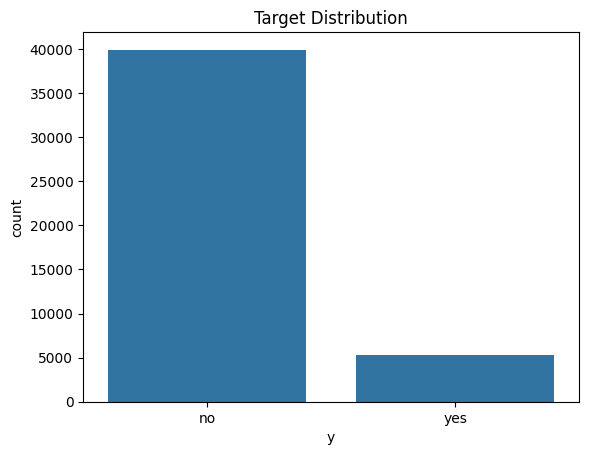

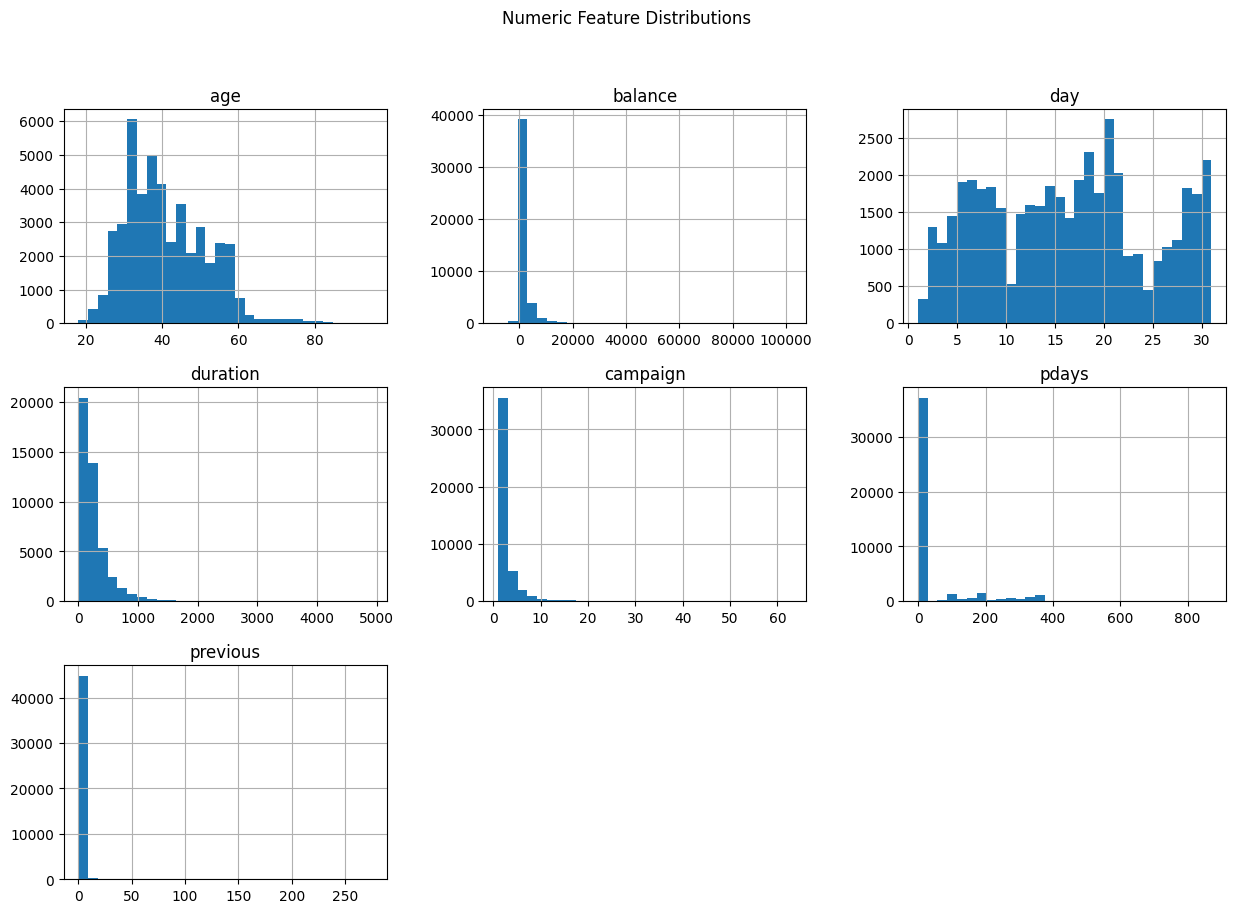

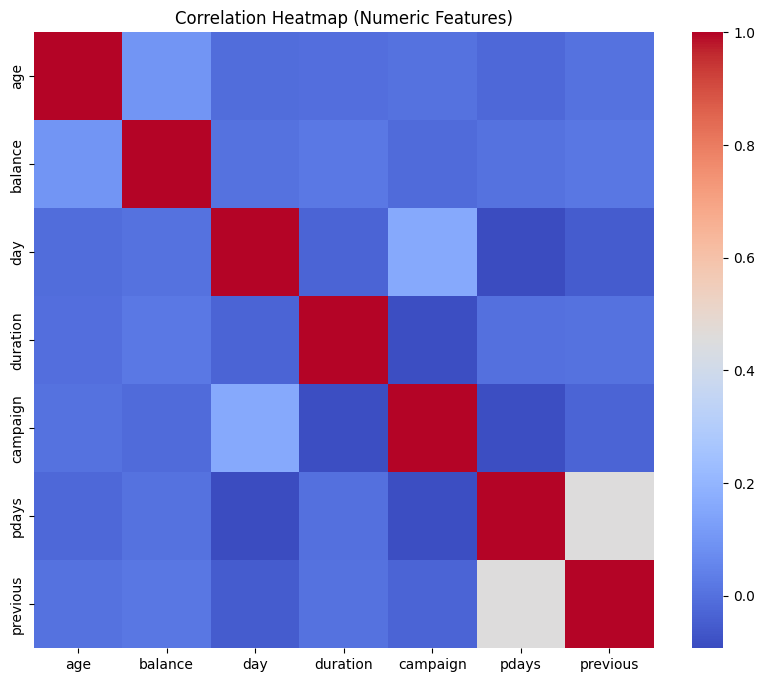

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution plot
plt.figure()
sns.countplot(x="y", data=df)
plt.title("Target Distribution")
plt.show()

# Histograms for numeric columns
num_cols = df.select_dtypes(include=["int64"]).columns

df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

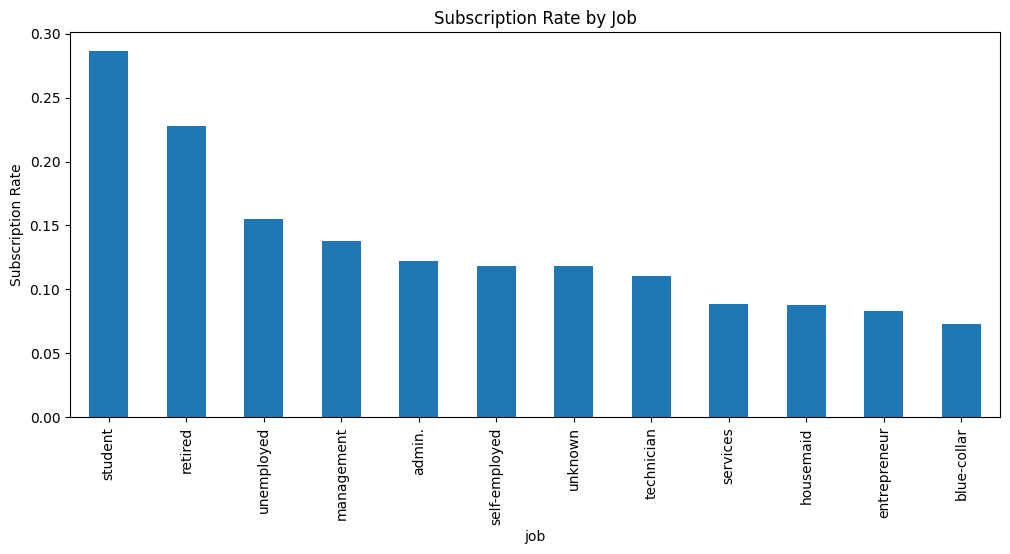

In [5]:
# Subscription rate by job
job_rate = df.groupby("job")["y"].value_counts(normalize=True).unstack()

job_rate["yes"].sort_values(ascending=False).plot(kind="bar", figsize=(12,5))
plt.ylabel("Subscription Rate")
plt.title("Subscription Rate by Job")
plt.show()

In [11]:
from src.data.load_data import load_bank_data
from src.data.preprocess import split_data, BankFeatureEngineer

In [12]:
df = load_bank_data("../data/raw/bank-full.csv")

X_train, X_test, y_train, y_test = split_data(df)

print(df.shape)
print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))


(45211, 17)
(36168, 15) (9043, 15)
y
0    0.883018
1    0.116982
Name: proportion, dtype: float64


In [13]:
from src.data.preprocess import BankFeatureEngineer

fe = BankFeatureEngineer()
X_sample = df.drop(columns=["y", "duration"]).head(5)

X_fe = fe.fit_transform(X_sample)

X_fe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,prev_contacted,campaign_bin,age_group,balance_log
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0,once,senior,7.670429
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0,once,mid,3.401197
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0,once,mid,1.098612
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0,once,senior,7.317876
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,0,once,mid,0.693147


In [14]:
X_fe.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
campaign          0
pdays             0
previous          0
poutcome          0
prev_contacted    0
campaign_bin      0
age_group         0
balance_log       0
dtype: int64